### Utforskende data analyse av student performance datasett.

- I denne filen gjennomfører jeg utforskende data analyse av student performace datasettet, først med hoved hensyn for modellene i oblig3 deretter
gjennomfører jeg videre analyse for modellene i oblig4 der hvor dette er hensiktsmessig. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam, RMSprop
from scikeras.wrappers import KerasClassifier

In [2]:
df = pd.read_csv(r"..\..\oblig3_og_4\student_performance.csv", delimiter=";")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [3]:
pd.set_option('display.max_columns', None)
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [4]:
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [5]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


### Beskrivelse av dataset:
Datasettet består av 36 features/kolonner og en target/kolonne. Alle featurene er oppgitt i numeriske verdier, men flere har disse ser ut til å ha blitt transformert fra categoriske verdier/input og er ikke en del av en sammenhengende tallrekke. Hensikten med datasettet er å predikere akademisk frafall og si noe om hvilke features som påvirker dette. Hver rad i datasette representere en student.

- Feature kolonnene inneholder forskjellig informasjon om akademsike, demografiske og sosial økonomiske faktorer som var kjent ved oppstart.

- Target kolonnen oppgir 3 kategoriske verdier, Enrolled, Droppout og Graduated. Disse beskriver statusen studenten har ved avsluttning av normal vargihet for et fag.

- Datasette skal ikke inneholde noen manglende verdier.

- Det står også i beskrivelsen av datasette at det har blitt gjennomført en begtydelig preprossesering av datasettet for eventuelle uteliggere og manglende data.

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


<Axes: xlabel='Target'>

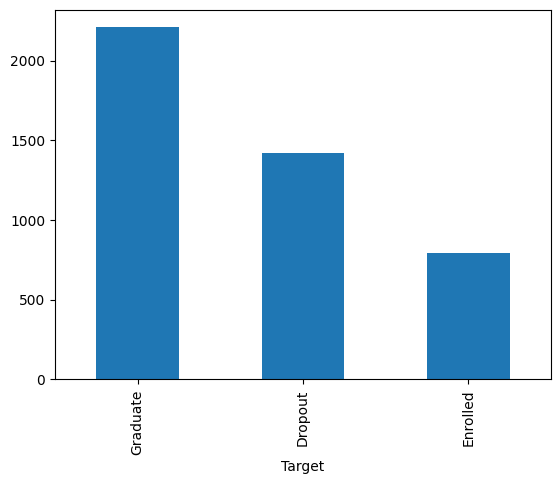

In [6]:
print(df['Target'].value_counts())
df['Target'].value_counts().plot.bar()

- Som vi ser av tellingen av kategoriene i target kolonnen, så er det noe skjevfordeling i antallet av de forskjellige kategoriene, men alle kategoriene er godt representert og ingen av katagoriene har et veldig lavt antall representasjoner.

2    2209
0    1421
1     794
Name: count, dtype: int64


<Axes: >

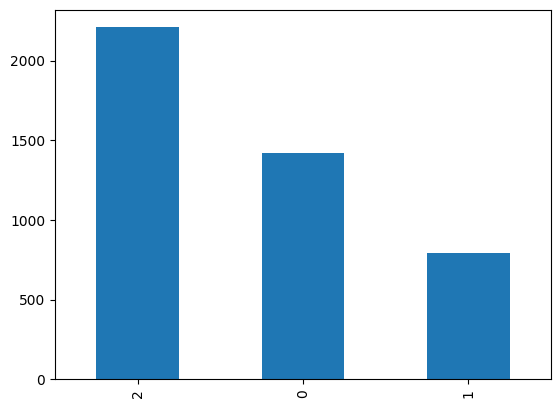

In [7]:
df_targets = pd.Series(LabelEncoder().fit_transform(df['Target']))
print(df_targets.value_counts())
df_targets.value_counts().plot.bar()

- Siden target kollonnen i utgangspunktet inneholdeholder kategoriskeverdier så må vi transformere disse før vi bruker datasette videre.

c:\Users\hallo\Documents\GitHub\praktisk-maskinlering\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


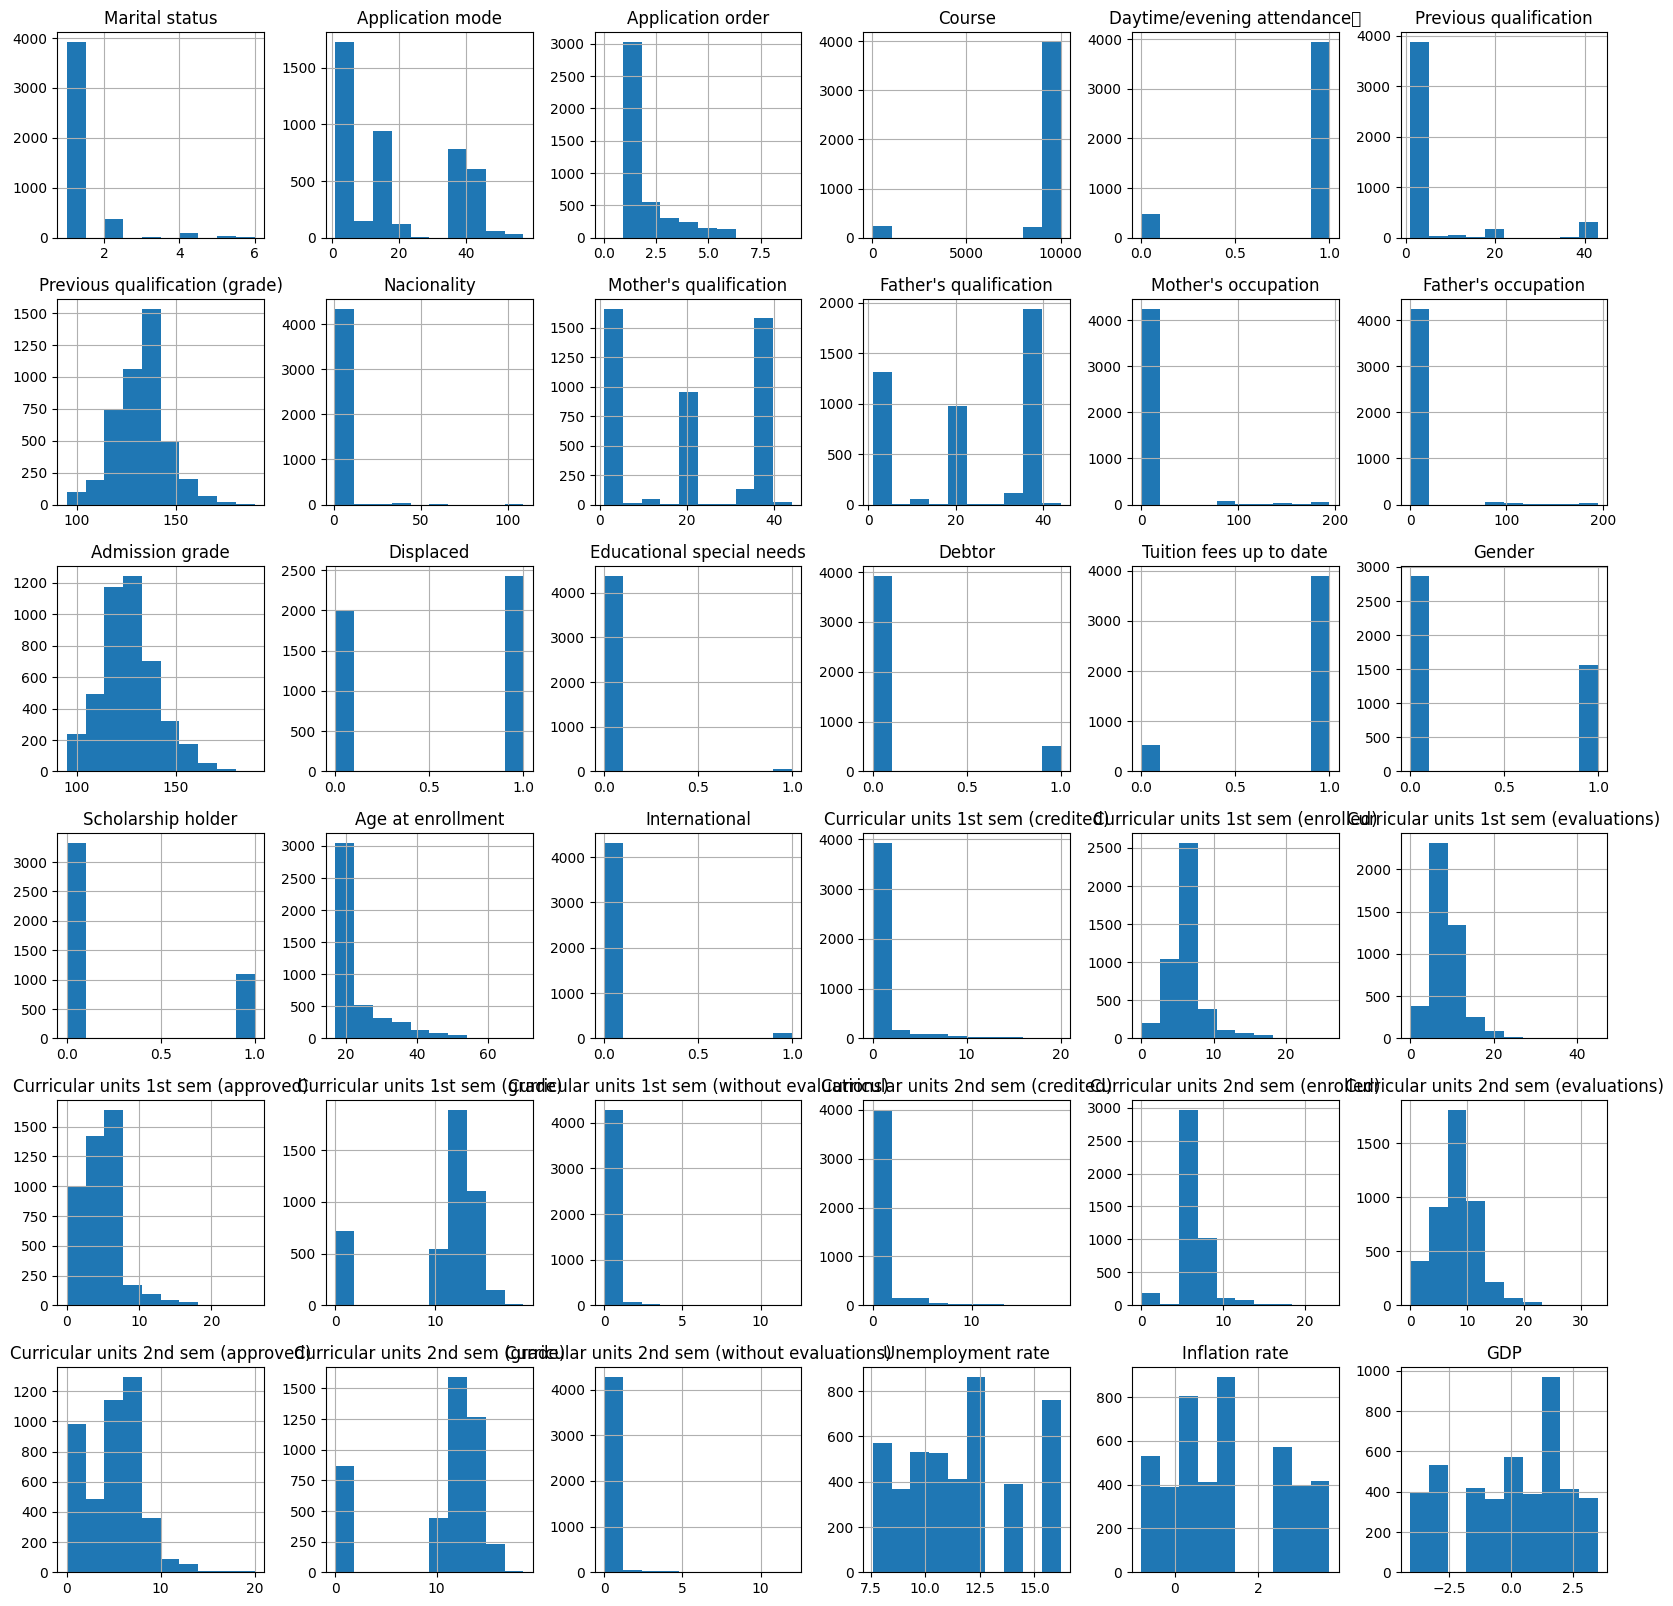

In [8]:
df_features = df.drop("Target", axis=1)
df_features.hist(figsize=(20,20))
plt.show()

#### Histogram av feature kolonnene.
- Histogrammet viser at det er betydelig forskjell i skalaene til de forskjellige featurene og det vil derfor være hensiktsmessig å gjennomføre en scalering slik at disse er repsresetert innenfor samme scalering. Jeg kommer til å bruke en standard mean scalering til å gjennomføre dette.

- Vi ser også at datasettet inneholder en kobinasjon av kolonner med kontinuelige tallrekker og transformerte kategoriske data. Vi ser også at mange av kolonnen inneholder data som ikke er normalfordelt, men det er i utgangspunkt vansklig å gjøre noe med dette ut i fra sammensettning av datasetet uten å potensielt miste mye informasjon, det vil derfor være hensiksmessig å bruke modeller som ikke er avhenig av normalfordelete data for å prestere bra. 

c:\Users\hallo\Documents\GitHub\praktisk-maskinlering\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


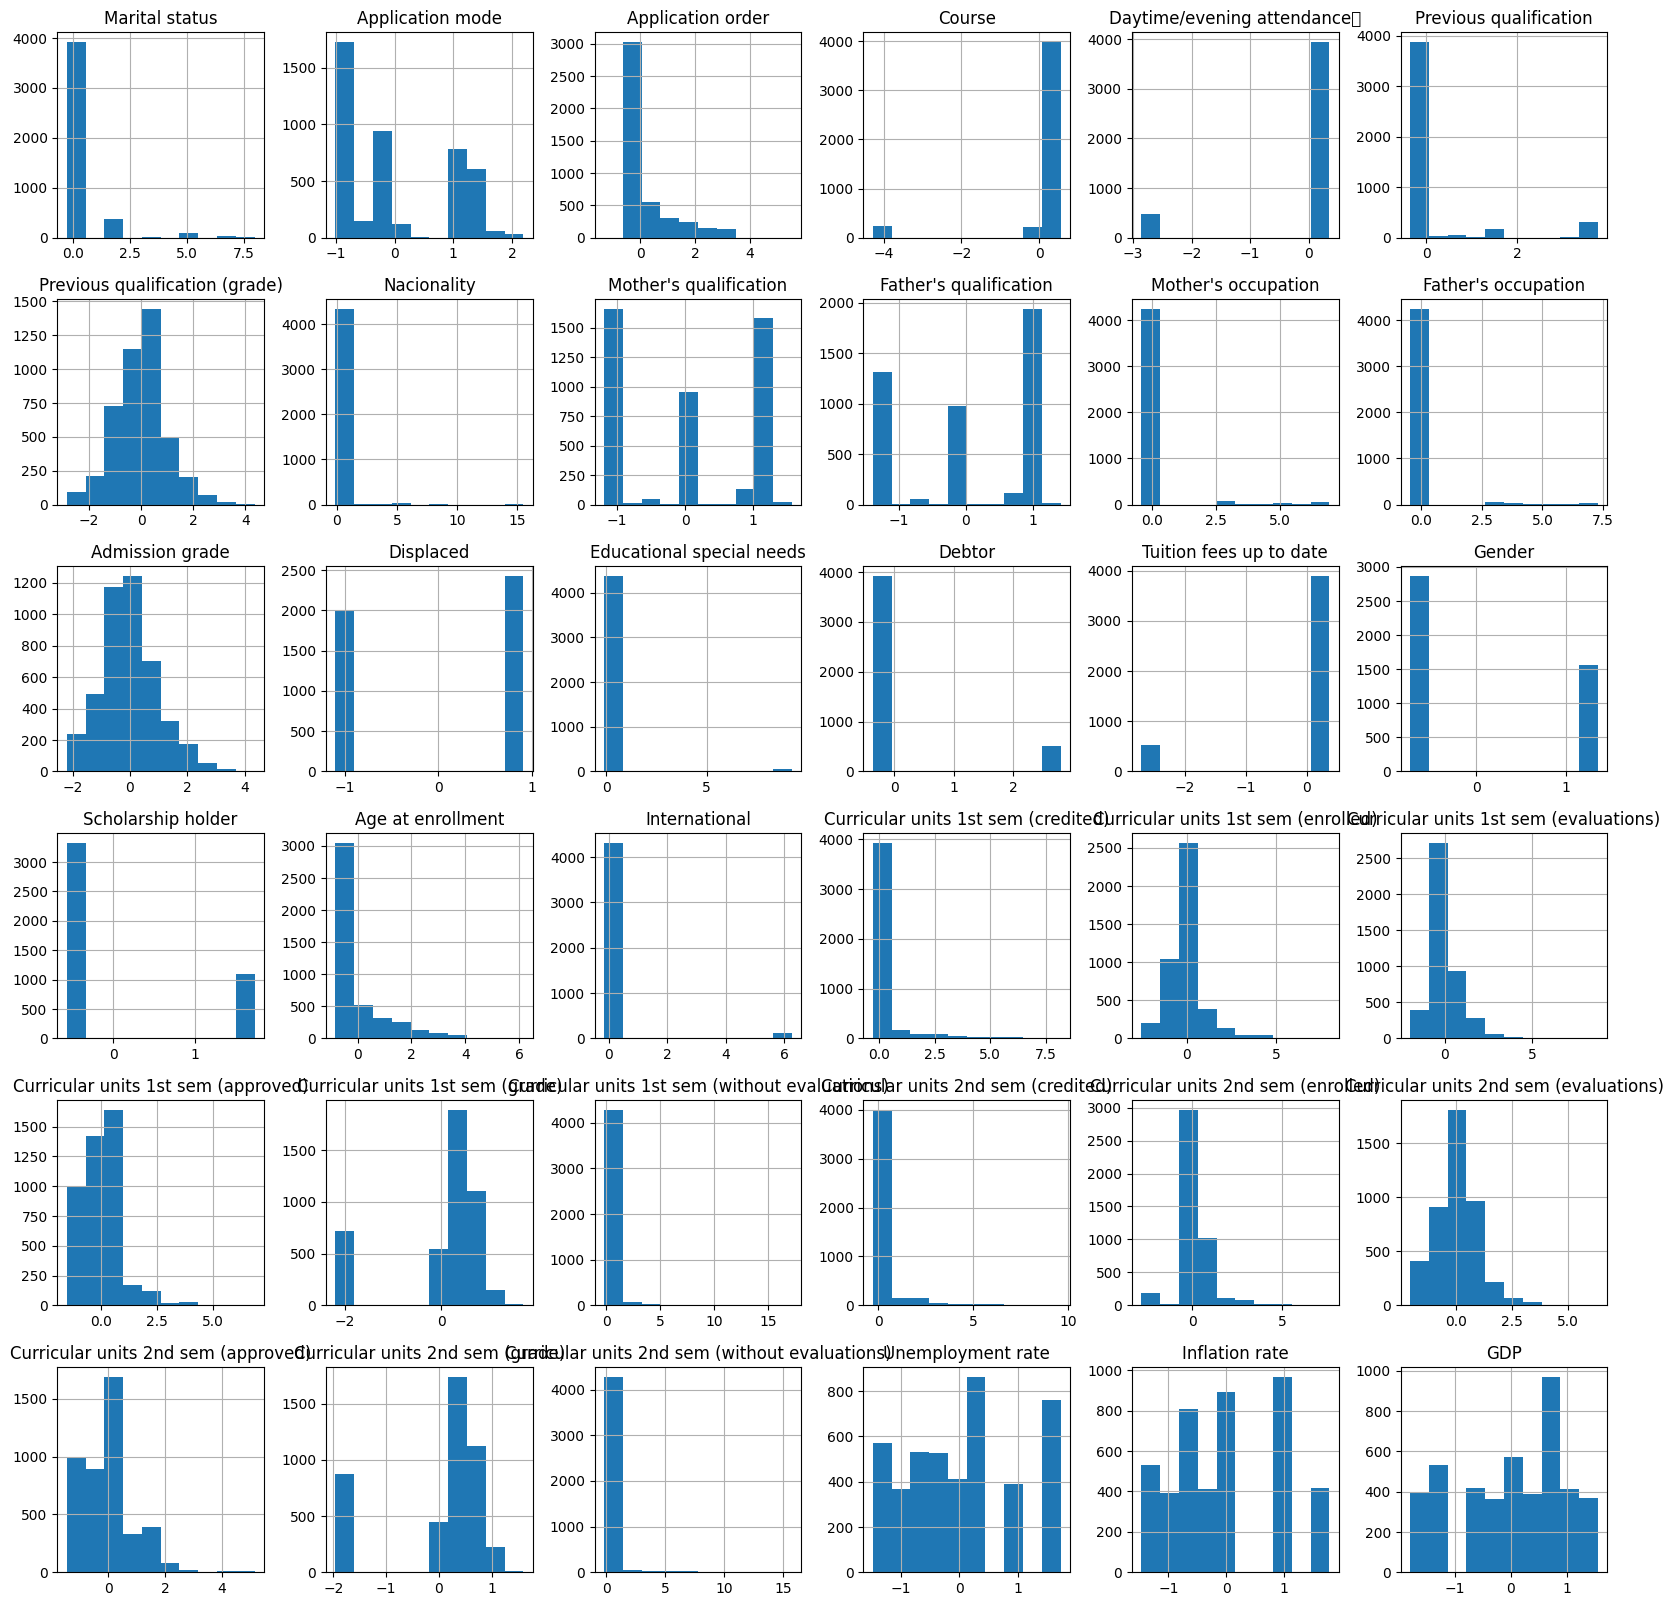

In [9]:
df_features = pd.DataFrame(StandardScaler().fit_transform(df_features), columns=df_features.columns)
df_features.hist(figsize=(20,20))
plt.show()

In [10]:
df_enrolled = df[df['Target'] == 'Enrolled']
df_dropout = df[df['Target'] == 'Dropout'].sample(len(df_enrolled))
df_graduate = df[df['Target'] == 'Graduate'].sample(len(df_enrolled))

df_downsample = pd.concat([df_enrolled, df_dropout, df_graduate])
df_downsample = df_downsample.sample(frac=1)

df_downsample_features = pd.DataFrame(StandardScaler().fit_transform(df_downsample.drop('Target', axis=1)), columns=df_downsample.drop('Target', axis=1).columns)
df_downsample_target = pd.Series(LabelEncoder().fit_transform(df_downsample['Target']))

1    794
0    794
2    794
Name: count, dtype: int64


<Axes: >

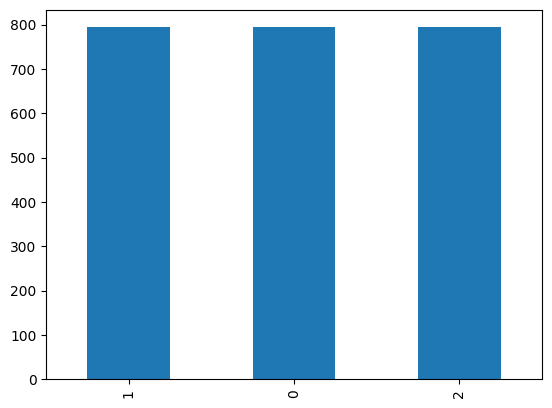

In [11]:
print(df_downsample_target.value_counts())
df_downsample_target.value_counts().plot.bar()

In [12]:
print(cross_val_score(RandomForestClassifier(), X=df_downsample_features, y=df_downsample_target))
print(cross_val_score(RandomForestClassifier(), X=df_features, y=df_targets))

[0.70649895 0.72536688 0.74579832 0.70168067 0.7394958 ]
[0.7740113  0.7740113  0.78757062 0.78531073 0.77149321]


In [ ]:
print(cross_val_score(GradientBoostingClassifier(), X=df_downsample_features, y=df_downsample_target))
print(cross_val_score(GradientBoostingClassifier(), X=df_features, y=df_targets))

In [ ]:
print(cross_val_score(LogisticRegression(), X=df_downsample_features, y=df_downsample_target))
print(cross_val_score(LogisticRegression(), X=df_features, y=df_targets))

[0.67295597 0.68134172 0.72478992 0.71008403 0.72058824]
[0.77514124 0.76271186 0.77966102 0.76384181 0.75      ]


#### Test av downsampling på target kolonnen
- Selvom alle kategoriene i target kolonnen har en god representasjon av verdier, så har jeg valg å gjennomføre en test av downsampling på datasettet for å se om dette kan gi noen positiv påvirking på treningen av datasettet.

- For å gjennomføre downsamplingen har jeg downsamplet katagoriene for "Graduated" og "Droppout" mot antallet av verdier i "Enrolled", slik at disse er likt representert i datasettet. Deretter har jeg brukt cross_val_score til å gjennomføre en enkel test for å sammenligne downsampling og ikke for de modellene jeg planlegger å bruke videre i analysen.

- Som vi kan se av resultatene i cellene over ga det ikke bedre resultater å gjennomføre en downsampling, så jeg kommer ikke til å bruke dette videre i analysen.

c:\Users\hallo\Documents\GitHub\praktisk-maskinlering\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()


<Axes: >

c:\Users\hallo\Documents\GitHub\praktisk-maskinlering\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\hallo\Documents\GitHub\praktisk-maskinlering\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


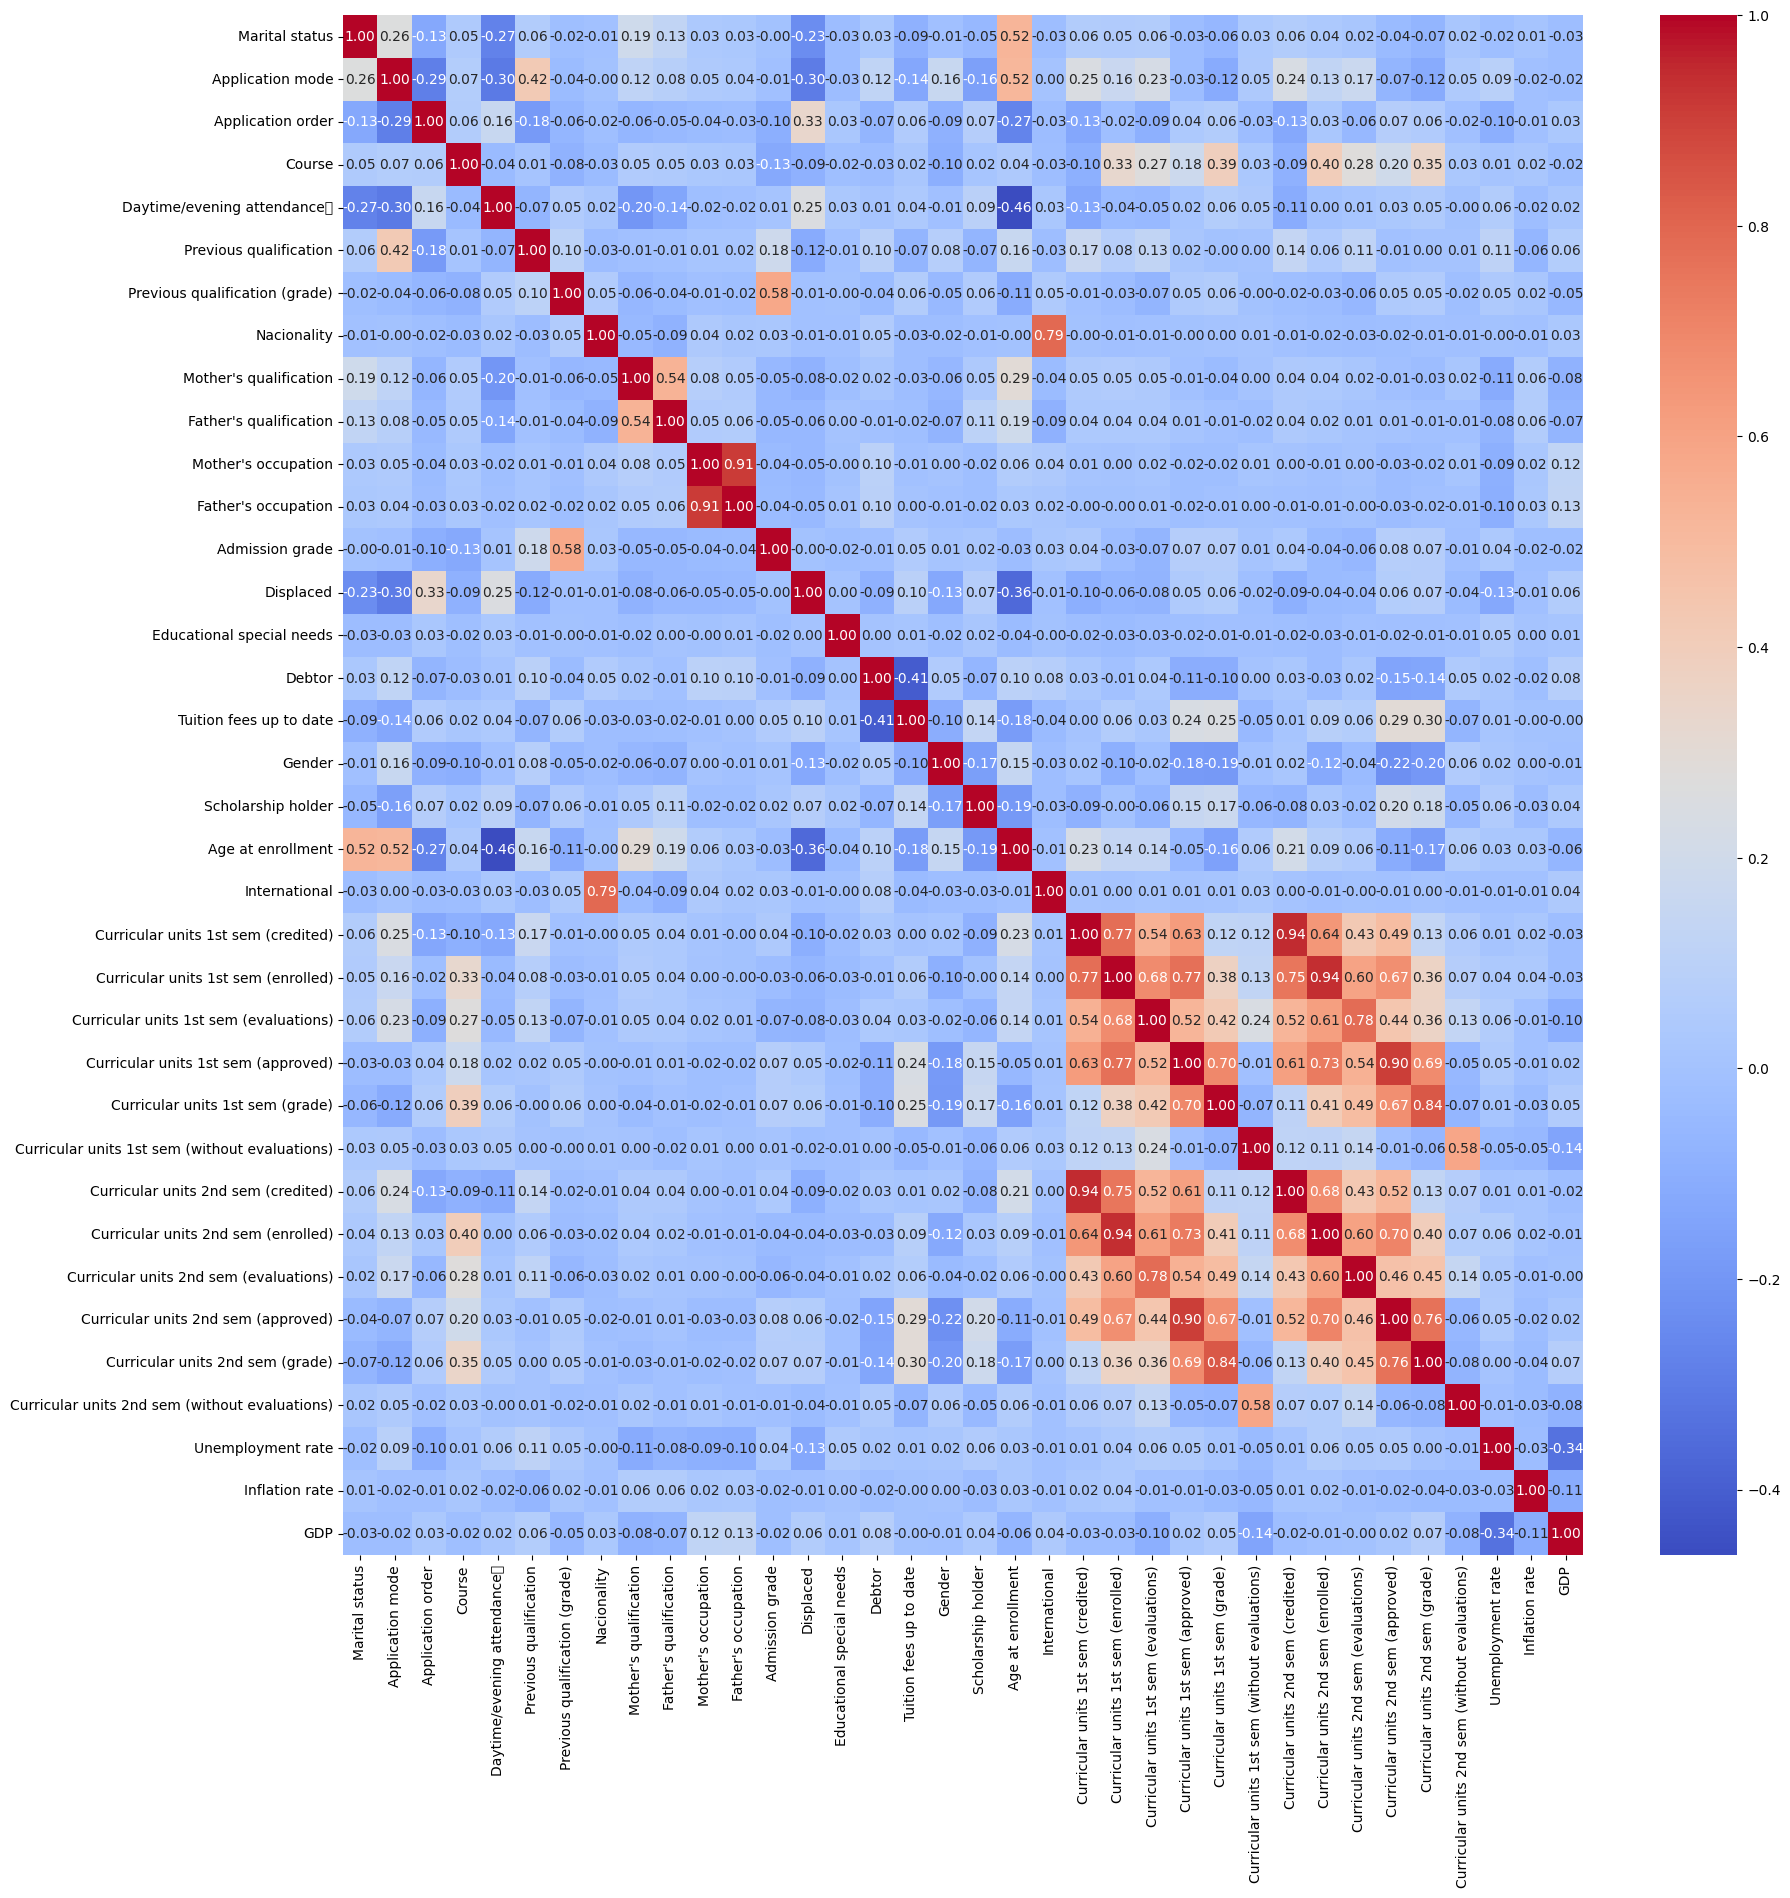

In [ ]:
df_correlation = df_features.corr()
plt.figure(figsize=(20,20))
sb.heatmap(df_correlation, annot=True, cmap="coolwarm", fmt=".2f")

#### Korrelasjon
- Som vi kan se av plotet over er det noen features som har en betydelig korrelasjon, jeg kommer defor til bruke PCA til å teste om noen eller flere av featurene kan kombineres for å redusere denne korrelasjonen, samt gjøre datasettet mindre og mindre tidskrevende å trene, tune og teste.

In [52]:
features_pca10 = pd.DataFrame(PCA(n_components=10).fit_transform(df_features))
features_pca14 = pd.DataFrame(PCA(n_components=14).fit_transform(df_features))
features_pca18 = pd.DataFrame(PCA(n_components=18).fit_transform(df_features))
features_pca22 = pd.DataFrame(PCA(n_components=22).fit_transform(df_features))
features_pca26 = pd.DataFrame(PCA(n_components=26).fit_transform(df_features))
features_pca29 = pd.DataFrame(PCA(n_components=29).fit_transform(df_features))
features_pca32 = pd.DataFrame(PCA(n_components=32).fit_transform(df_features))
features_pca35 = pd.DataFrame(PCA(n_components=35).fit_transform(df_features))

In [ ]:
print(f'PCA 10 scores: ${cross_val_score(RandomForestClassifier(), X=features_pca10, y=df_targets)}')
print(f'PCA 10 scores: ${cross_val_score(RandomForestClassifier(), X=features_pca14, y=df_targets)}')
print(f'PCA 10 scores: ${cross_val_score(RandomForestClassifier(), X=features_pca18, y=df_targets)}')
print(f'PCA 10 scores: ${cross_val_score(RandomForestClassifier(), X=features_pca22, y=df_targets)}')
print(f'PCA 10 scores: ${cross_val_score(RandomForestClassifier(), X=features_pca26, y=df_targets)}')
print(f'PCA 10 scores: ${cross_val_score(RandomForestClassifier(), X=features_pca29, y=df_targets)}')
print(f'PCA 10 scores: ${cross_val_score(RandomForestClassifier(), X=features_pca32, y=df_targets)}')
print(f'PCA 10 scores: ${cross_val_score(RandomForestClassifier(), X=features_pca35, y=df_targets)}')
print(f'Regular scores: ${cross_val_score(RandomForestClassifier(), X=df_features, y=df_targets)}')


[0.7220339  0.72881356 0.72768362 0.72090395 0.7239819 ]
[0.73559322 0.73333333 0.7299435  0.72881356 0.72058824]
[0.73220339 0.74576271 0.74237288 0.72090395 0.72850679]
[0.74237288 0.75932203 0.76045198 0.72768362 0.73190045]
[0.73898305 0.74463277 0.75367232 0.73333333 0.72058824]
[0.73559322 0.75254237 0.73898305 0.74463277 0.72285068]
[0.75480226 0.75141243 0.75367232 0.73672316 0.72285068]
[0.74350282 0.7480226  0.75932203 0.74237288 0.74208145]
[0.77853107 0.78870056 0.7819209  0.77288136 0.75452489]


In [ ]:
print(f'PCA 10 scores: ${cross_val_score(GradientBoostingClassifier(), X=features_pca10, y=df_targets)}')
print(f'PCA 14 scores: ${cross_val_score(GradientBoostingClassifier(), X=features_pca14, y=df_targets)}')
print(f'PCA 18 scores: ${cross_val_score(GradientBoostingClassifier(), X=features_pca18, y=df_targets)}')
print(f'PCA 22 scores: ${cross_val_score(GradientBoostingClassifier(), X=features_pca22, y=df_targets)}')
print(f'PCA 26 scores: ${cross_val_score(GradientBoostingClassifier(), X=features_pca26, y=df_targets)}')
print(f'PCA 29 scores: ${cross_val_score(GradientBoostingClassifier(), X=features_pca29, y=df_targets)}')
print(f'PCA 32 scores: ${cross_val_score(GradientBoostingClassifier(), X=features_pca32, y=df_targets)}')
print(f'PCA 35 scores: ${cross_val_score(GradientBoostingClassifier(), X=features_pca35, y=df_targets)}')
print(f'Regular scores: ${cross_val_score(GradientBoostingClassifier(), X=df_features, y=df_targets)}')

[0.71299435 0.71073446 0.7299435  0.7220339  0.71719457]
[0.72542373 0.71864407 0.73785311 0.73220339 0.73190045]
[0.73898305 0.73785311 0.73333333 0.73220339 0.73303167]
[0.73785311 0.74124294 0.74350282 0.73559322 0.73303167]
[0.73220339 0.74237288 0.73898305 0.74237288 0.73642534]
[0.73898305 0.74576271 0.74463277 0.74350282 0.73076923]
[0.74576271 0.75819209 0.75141243 0.75480226 0.74886878]
[0.75367232 0.75819209 0.74237288 0.75706215 0.74773756]
[0.76610169 0.7819209  0.78870056 0.78531073 0.76923077]


In [ ]:
print(f'PCA 10 scores: ${cross_val_score(LogisticRegression(), X=features_pca10, y=df_targets)}')
print(f'PCA 14 scores: ${cross_val_score(LogisticRegression(), X=features_pca14, y=df_targets)}')
print(f'PCA 18 scores: ${cross_val_score(LogisticRegression(), X=features_pca18, y=df_targets)}')
print(f'PCA 22 scores: ${cross_val_score(LogisticRegression(), X=features_pca22, y=df_targets)}')
print(f'PCA 26 scores: ${cross_val_score(LogisticRegression(), X=features_pca26, y=df_targets)}')
print(f'PCA 29 scores: ${cross_val_score(LogisticRegression(), X=features_pca29, y=df_targets)}')
print(f'PCA 32 scores: ${cross_val_score(LogisticRegression(), X=features_pca32, y=df_targets)}')
print(f'PCA 32 scores: ${cross_val_score(LogisticRegression(), X=features_pca35, y=df_targets)}')
print(f'Regualr scores: ${cross_val_score(LogisticRegression(), X=df_features, y=df_targets)}')

[0.71525424 0.71073446 0.71638418 0.70734463 0.70022624]
[0.7299435  0.7299435  0.73333333 0.71751412 0.72850679]
[0.73559322 0.74576271 0.75819209 0.73333333 0.74660633]
[0.74576271 0.75254237 0.76158192 0.75254237 0.73190045]
[0.75706215 0.76610169 0.76384181 0.75480226 0.73190045]
[0.75819209 0.77288136 0.76158192 0.75819209 0.72963801]
[0.7819209  0.76723164 0.7819209  0.76045198 0.74773756]
[0.7740113  0.76384181 0.77966102 0.76158192 0.75      ]
[0.77514124 0.76271186 0.77966102 0.76384181 0.75      ]


#### PCA testing
- For å test ut som PCA kan gi bedre resultater for treningen av datasettet så har jeg bruket PCA til å samle datasette til ferre features, jeg valgt å test dette for et utvalg av utput features (10-35, samt uendrett) for å se om gir noen positiv effekt på prestajonen for modellen på dette datasettet.

- Akkurat som ved testing av downsampling har jeg bruk cross_val_score til å gjennoføre en enkelt testing for de modellene jeg har planer om å bruke videre.

- Ut i fra resultatene som denne testingen gir, så ser det ikke ut til å være hensiktsmessig å bruke PCA på dette datasette videre i analysen i forhold til prestasjonen til datasettet da det ikke gir noen betydelig bedre resultater for noen av modellene. Vi ser også av resultatene at prestasjonene til datasettet generelt er bedre desto flere av featurene som er bevart som opprinnelig. 

- For LogisticRegession er det imidlertid potensielt noe bedre resultat for en PCA kombinasjon med 32 features og hvis vi kun skulle ha 100% validert modeller for dette datasettet så kunne det ha vært interesant å undersøkde dette nærmere med videre tuning av modellen.

- Jeg velger å bruke det opprinnelige datasettet uten PCA kombinasjon videre da mener dette er mest hensiktsmessig i forhold til oppgaven og sammenligningen mellom modellene.

### Oblig 4

- For neural network modellene i oblig 4 kommer jeg til å gjennomføre en sammeligning med PCA og downsamlping på samme måte som jeg har gjort for de andre modellene fra oblig3.

In [44]:
def create_model(input=36):
    model = Sequential()
    model.add(Input(shape=(input,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(15, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
downsampled_scores = cross_val_score(KerasClassifier(model=create_model(), verbose=0), df_downsample_features, df_downsample_target)
regular_scores = cross_val_score(KerasClassifier(model=create_model(), verbose=0), df_features, df_targets)

In [34]:
print(f'Downsampled scores:  ${downsampled_scores}')
print(f'Regular scores:  ${regular_scores}')

Downsampled scores:  $[0.57861635 0.6163522  0.54201681 0.54201681 0.57773109]
Regular scores:  $[0.71186441 0.74011299 0.71977401 0.72881356 0.72058824]


#### Downsamlping

- Som vi ser av resultatene for downsamling får vi betydelig dårligere prestasjon for en enkel test modell og jeg kommer derfor ikke til å bruke dette videre i anlysen for disse modellene heller.

In [ ]:
pca10_score = cross_val_score(KerasClassifier(model=create_model(10), verbose=0), X=features_pca10, y=df_targets)
pca14_score = cross_val_score(KerasClassifier(model=create_model(14), verbose=0), X=features_pca14, y=df_targets)
pca18_score = cross_val_score(KerasClassifier(model=create_model(18), verbose=0), X=features_pca18, y=df_targets)
pca22_score = cross_val_score(KerasClassifier(model=create_model(22), verbose=0), X=features_pca22, y=df_targets)
pca26_score = cross_val_score(KerasClassifier(model=create_model(26), verbose=0), X=features_pca26, y=df_targets)
pca29_score = cross_val_score(KerasClassifier(model=create_model(29), verbose=0), X=features_pca29, y=df_targets)
pca32_score = cross_val_score(KerasClassifier(model=create_model(32), verbose=0), X=features_pca32, y=df_targets)
pca35_score = cross_val_score(KerasClassifier(model=create_model(35), verbose=0), X=features_pca35, y=df_targets)

In [ ]:
print(f'PCA 10 scores:  ${pca10_score}')
print(f'PCA 14 scores:  ${pca14_score}')
print(f'PCA 18 scores:  ${pca18_score}')
print(f'PCA 22 scores:  ${pca22_score}')
print(f'PCA 26 scores:  ${pca26_score}')
print(f'PCA 29 scores:  ${pca29_score}')
print(f'PCA 32 scores:  ${pca32_score}')
print(f'PCA 35 scores:  ${pca35_score}')
print(f'Regular scores:  ${regular_scores}')

PCA10 scores:  $[0.70056497 0.71864407 0.69378531 0.70508475 0.70135747]
PCA14 scores:  $[0.69265537 0.72090395 0.7039548  0.69943503 0.69570136]
PCA18 scores:  $[0.70169492 0.70847458 0.68700565 0.69265537 0.68778281]
PCA22 scores:  $[0.72542373 0.73672316 0.69943503 0.69265537 0.70022624]
PCA26 scores:  $[0.70734463 0.72542373 0.71073446 0.7039548  0.70588235]
PCA29 scores:  $[0.72090395 0.73785311 0.71638418 0.70847458 0.72171946]
PCA32 scores:  $[0.70169492 0.7220339  0.70960452 0.68587571 0.68665158]
PCA35 scores:  $[0.7220339  0.72768362 0.70847458 0.70508475 0.70927602]
Regular scores:  $[0.71186441 0.74011299 0.71977401 0.72881356 0.72058824]


#### PCA

- For PCA analysen er det ingen av feature kobinasjonene som gir noe betydelig bedre prestasjon for den enkel test modellen, men det er flere av kombinasjonene som ser ut til å gi tilsvarende prestajon. Hvis målet hadde vært å gjennomføre en 100% analyse så hadde det vært hensiksmessig å utforske dette videre sammen med fullstedning tuning av modellen.

- Jeg kommer for denne analysen til å beholde det opprinnelige datasette, slik at det enklere å sammenlige prestasjon opp mot de andre modellene. 